In [3]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

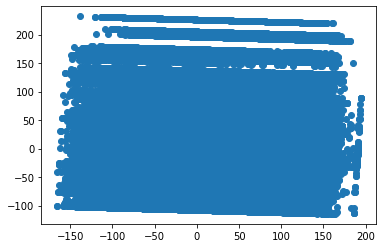

In [11]:
np.random.seed(5)

X = pd.read_csv('../preprocessed_data_Defi-IA-2022-Rain-Frogs/X_station_coord_2nn_imputed_by_day.csv')
y_train = X['ground_truth']
del X['ground_truth']
del X['date']
del X['timestamp']
del X['number_sta']
del X['Id']

pca = decomposition.PCA()
pca.fit(X)
hc_features = pca.transform(X)

plt.scatter(hc_features[:, 0], hc_features[:, 1])
plt.show()

In [43]:
linear_comp = pd.DataFrame(columns = X.columns, data = np.abs(np.round(pca.components_,2)))
linear_comp["explained_variance_ratio"] = np.round(pca.explained_variance_ratio_,4)
linear_comp = linear_comp.reindex(columns = ['explained_variance_ratio'] + list(linear_comp.columns[:-1]))
# linear_comp.set_index("explained_variance_ratio", inplace=True)
print("Linear Composition of each hand crafter feature : (/!\ absolute value and rounded 2 dp)")
linear_comp

Linear Composition of each hand crafter feature : (/!\ absolute value and rounded 2 dp)


,explained_variance_ratio,wind_speed,temperature,dew_point,humidity,wind_direction,precip,month,latitude,longitude,height_sta
0,0.5268,0.01,0.01,0.01,0.01,1.00,0.01,0.00,0.00,0.00,0.04
1,0.4540,0.00,0.01,0.00,0.00,0.04,0.00,0.00,0.00,0.01,1.00
2,0.0111,0.01,0.35,0.14,0.92,0.01,0.08,0.01,0.01,0.01,0.01
3,0.0045,0.05,0.64,0.66,0.33,0.02,0.05,0.19,0.00,0.02,0.01
4,0.0016,0.11,0.02,0.02,0.07,0.01,0.97,0.22,0.00,0.02,0.00
5,0.0010,0.05,0.09,0.15,0.09,0.00,0.22,0.95,0.00,0.02,0.00
6,0.0004,0.87,0.05,0.08,0.02,0.01,0.09,0.09,0.09,0.46,0.01
7,0.0002,0.38,0.48,0.47,0.11,0.00,0.03,0.01,0.10,0.62,0.00
8,0.0002,0.23,0.48,0.54,0.10,0.00,0.02,0.03,0.13,0.63,0.00
9,0.0001,0.15,0.03,0.03,0.00,0.00,0.01,0.01,0.98,0.10,0.00


In [52]:
print("weighted sum :")
for col in linear_comp.columns[1:]:
    print(col.rjust(15), ":", np.round(np.sum(linear_comp[col] * linear_comp["explained_variance_ratio"]),3))

weighted sum :
     wind_speed : 0.006
    temperature : 0.017
      dew_point : 0.01
       humidity : 0.017
 wind_direction : 0.545
         precip : 0.008
          month : 0.002
       latitude : 0.0
      longitude : 0.005
     height_sta : 0.475
